In [34]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
import random

In [35]:
def threshold_image(im,th):
  threshold_im = np.zeros(im.shape)
  threshold_im[im >= th] = 1
  return threshold_im

def compute_otsu_criteria(im, th):
  thresholded_im = threshold_image(im,th)
  nb_pixels = im.size
  nb_pixels1 = np.count_nonzero(thresholded_im)

  weight1 = nb_pixels1 / nb_pixels
  weight0 = 1 - weight1
  if weight1 == 0 or weight0 == 0 :
    return np.inf

  val_pixels1 = im[thresholded_im == 1]
  val_pixels0 = im[thresholded_im == 0]

  var0 = np.var(val_pixels0) if len(val_pixels0) > 0 else 0
  var1 = np.var(val_pixels1) if len(val_pixels1) > 0 else 0

  return weight0 * var0 + weight1 * var1

In [36]:
def genetic_algorithm(image, population_size=50, generations=100, mutation_rate=0.01):
    # Inisialisasi populasi awal 
    population = np.random.randint(0, 256, population_size)

    for generation in range(generations):
        # Hitung fitness (within-class variability) 
        #fitness dari populasi random di awal
        fitness_scores = np.array([compute_otsu_criteria(image, threshold) for threshold in population])
        

        # Seleksi: Pilih threshold dengan fitness terendah (within-class terkecil)
        selected_population = population[np.argsort(fitness_scores)[:population_size//2] ]

        # Crossover: Buat generasi baru dari pasangan threshold terpilih
        offspring = []
        for _ in range(population_size - len(selected_population)):
            parent1, parent2 = random.sample(list(selected_population), 2) #Parent dipilih secara random
            crossover_point = random.randint(0, 8)  # Ambil titik crossover secara random
            child = (parent1 & (255 << crossover_point)) | (parent2 & (255 >> (8 - crossover_point))) #Menggunakan Left dan Right shift operator untuk dalam bentuk biner
            offspring.append(child)

        # Mutasi: Random Resetting
        for i in range(len(offspring)):
            if random.random() < mutation_rate:
                offspring[i] = random.randint(0, 256)

        # Generasi baru
        population = np.concatenate((selected_population, offspring))

    # Threshold terbaik (fitness terendah)
    best_threshold = population[np.argmin([compute_otsu_criteria(image, threshold) for threshold in population])]
    return best_threshold

In [33]:
path = "image.jpg"
im = np.asarray(Image.open(path).convert('L')) #L untuk luminance (merubah menjadi skala abu - abu)
print("Ukuran gambar = {}".format(im.shape))
print("Threshold terbaik = {}".format(genetic_algorithm(im)))

Ukuran gambar = (1080, 1920)
Threshold terbaik = 88


In [38]:
im_otsu = threshold_image(im, 88)

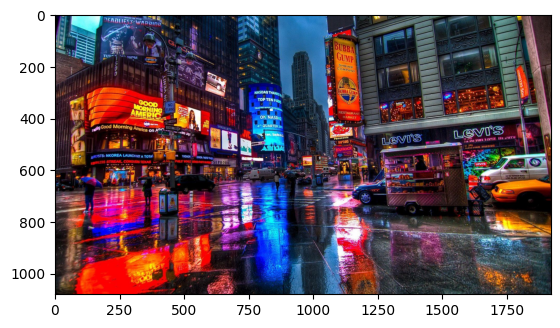

In [37]:
image = mpimg.imread(path)
plt.imshow(image)

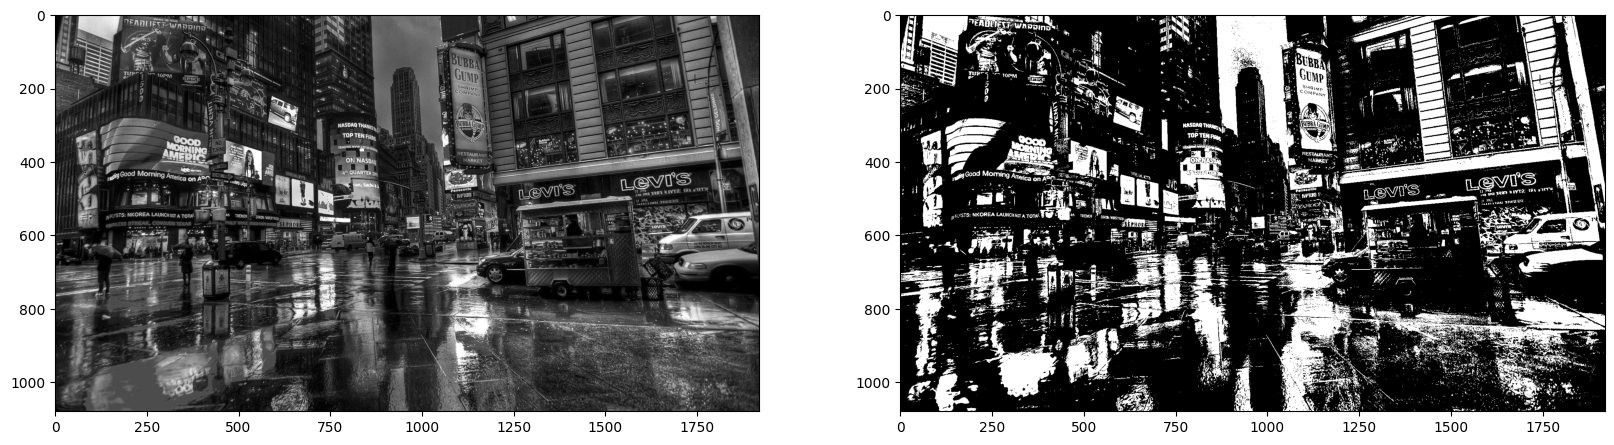

In [39]:
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
plt.imshow(im, cmap = 'gray')
plt.subplot(1,2,2)
plt.imshow(im_otsu, cmap = 'gray')